<a href="https://colab.research.google.com/github/Adansote/Proyecto5-Pronosticador-del-nivel-del-mar/blob/main/Proyecto5_Pronosticador_del_nivel_del_mar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Proyecto 5**

**Pronosticador del nivel del mar**

Analizará un conjunto de datos sobre el cambio del nivel medio del mar a nivel mundial desde 1880. Utilizarás los datos para predecir el cambio del nivel del mar hasta el año 2050.

Utiliza los datos para completar las siguientes tareas:

* Utiliza Pandas para importar los datos de epa-sea-level.csv.

* Utilice matplotlib para crear un gráfico de dispersión utilizando la columna Año como eje x y la columna Nivel del mar ajustado por CSIRO como eje y.
* Usa la función linregress de scipy.stats para obtener la pendiente e intersección con el eje y de la línea de mejor encaje. * Dibuja la línea de mejor encaje sobre el diagrama de dispersión. * Haz que la línea pase por el año 2050 para predecir el aumento del nivel del mar en ese año.
* Traza una nueva línea de mejor encaje utilizando datos del año 2000 hasta el año más reciente del conjunto de datos.
* Haz que la línea pase también por el año 2050 para predecir la subida del nivel del mar en 2050 si el ritmo de subida continúa como desde el año 2000.
* La etiqueta x debe ser Year, la etiqueta y debe ser Sea Level (inches) y el título debe ser Rise in Sea Level.
* El boilerplate también incluye los comandos para guardar y devolver la imagen.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress  #Función Clave para la Regresión Lineal



In [2]:
df = pd.read_csv("/content/epa-sea-level.csv")

In [3]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


Nombre de la Columna,Descripción en Español,Unidades
* Year (Año),El año de la medición del nivel del mar. Los datos van desde 1880 hasta el año más reciente de registro.,N/A

* CSIRO Adjusted Sea Level,Este es el nivel promedio ajustado del mar global calculado por el CSIRO (Organización de Investigación Científica e Industrial del Commonwealth). Es la columna principal que se usa en la regresión lineal para predecir la tendencia.,Pulgadas (Inches)

* Lower Error Bound,El límite de error inferior. Se utiliza en análisis más avanzados para mostrar el rango de incertidumbre de la medición del nivel del mar.,Pulgadas (Inches)
* Upper Error Bound,El límite de error superior. Muestra el límite superior del rango de incertidumbre.,Pulgadas (Inches)

* NOAA Adjusted Sea Level,El nivel promedio ajustado del mar global calculado por la NOAA (Administración Nacional Oceánica y Atmosférica de EE. UU.). Es una medición alternativa al valor CSIRO.,Pulgadas (Inches)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


In [5]:
df.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


** 1.- Utilice matplotlib para crear un gráfico de dispersión utilizando la columna Año como eje x y la columna Nivel del mar ajustado por CSIRO como eje y.**
Función Clave para la Regresión Lineal

Donde:
* Y es el Nivel del Mar Predicho.(CSIRO Adjusted Sea Level)
* X es el Año (extrapolado hasta 2050).
* m es la pendiente (slope).
* b es la intersección (intercept).

In [7]:
y = df['CSIRO Adjusted Sea Level']
x = df['Year']


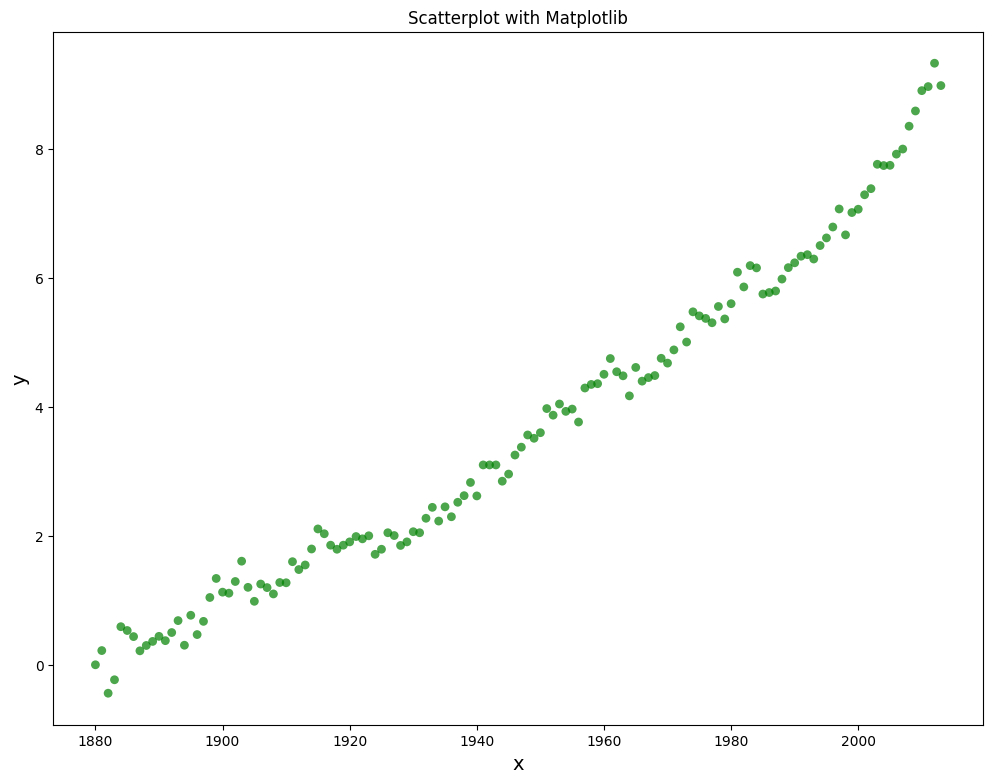

In [14]:
fig, ax = plt.subplots(figsize=(12, 9))

ax.scatter(x, y,
               s=40, # tamaño de los puntos
               color='green', # color
               alpha=0.7, #transparencia de los puntos
               edgecolors='none')

plt.xlabel("x", size=14)
plt.ylabel("y", size=14)
plt.title("Scatterplot with Matplotlib")

plt.show()

**Usa la función linregress de scipy.stats para obtener la pendiente e intersección con el eje y de la línea de mejor encaje. * Dibuja la línea de mejor encaje sobre el diagrama de dispersión. * Haz que la línea pase por el año 2050 para predecir el aumento del nivel del mar en ese año.**

In [9]:
# 1. Aplicar linregress al conjunto de datos completo (1880 en adelante)
#   Se le pasan los datos del Eje X y del Eje Y
resultado_completo = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])

In [10]:
# 2. Extraer los valores clave
#    m = slope (pendiente)
#    b = intercept (intersección)
pendiente_completa = resultado_completo.slope
interseccion_completa = resultado_completo.intercept

In [11]:
# 3. Crear una serie de años para la proyección (1880 hasta 2050)
#    Se usa numpy para crear una secuencia de años de forma eficiente
import numpy as np
años_proyeccion = np.arange(1880, 2051) # Crea un array de 1880 a 2050

In [12]:
# 4. Calcular los valores de Y proyectados (Nivel del Mar)
#    Usando la ecuación: Y = mX + b
#    (Nivel del Mar) = (Pendiente * Año) + Intersección
nivel_mar_proyectado = pendiente_completa * años_proyeccion + interseccion_completa

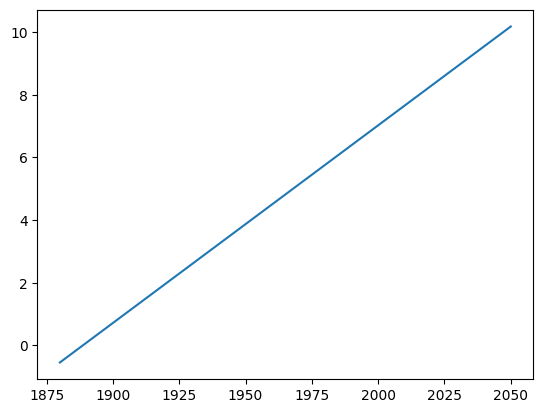

In [13]:
# 5. Visualización (Para Matplotlib)
#    En el código real, usarías esta información para dibujar la línea en el gráfico
plt.plot(años_proyeccion, nivel_mar_proyectado, label='Línea de ajuste completo')

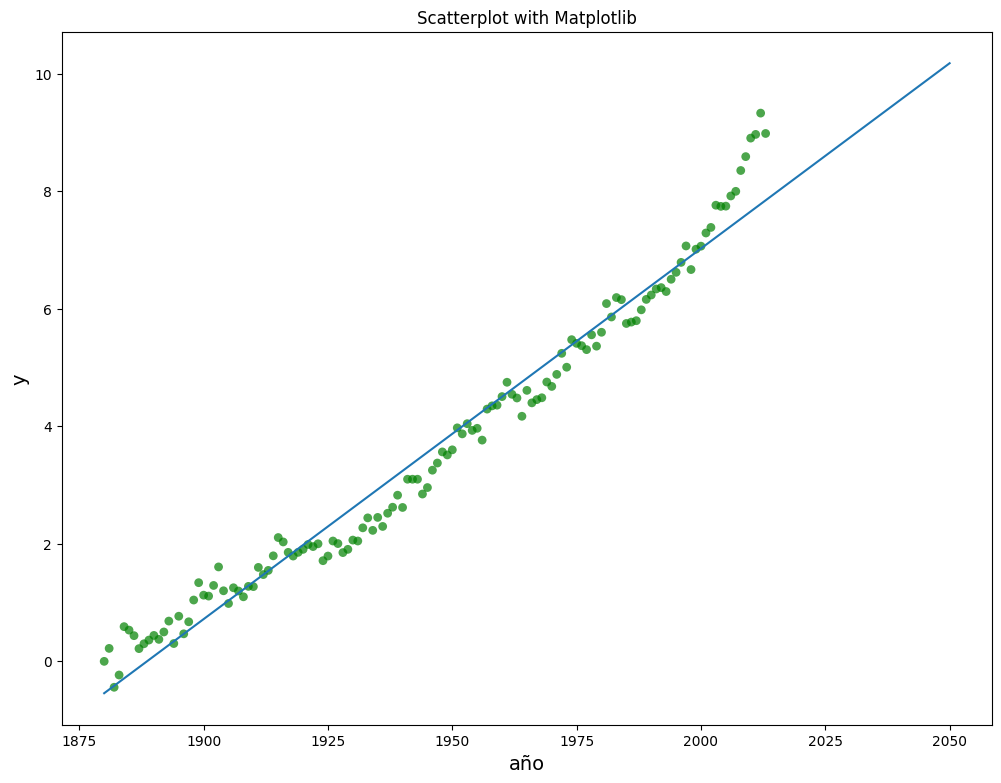

In [27]:
fig, ax = plt.subplots(figsize=(12, 9))
plt.plot(años_proyeccion, nivel_mar_proyectado, label='Línea de ajuste completo')
ax.scatter(x, y,
               s=40, # tamaño de los puntos
               color='green', # color
               alpha=0.7, #transparencia de los puntos
               edgecolors='none')

plt.xlabel("año", size=14)
plt.ylabel("y", size=14)
plt.title("Scatterplot with Matplotlib")

plt.show()

* Traza una nueva línea de mejor encaje utilizando datos del año 2000 hasta el año más reciente del conjunto de datos.

* Haz que la línea pase también por el año 2050 para predecir la subida del nivel del mar en 2050 si el ritmo de subida continúa como desde el año 2000.

* La etiqueta x debe ser Year, la etiqueta y debe ser Sea Level (inches) y el título debe ser Rise in Sea Level.

* El boilerplate también incluye los comandos para guardar y devolver la imagen.

In [16]:
# --- 1. Filtrar los Datos ---
# Se crea un nuevo DataFrame que incluye solo las filas donde el 'Year' es >= 2000
df_reciente = df[df['Year'] >= 2000]

In [17]:
# --- 2. Aplicar linregress a los Datos Recientes ---
# Se aplica linregress solo a los datos filtrados (df_reciente)
resultado_reciente = linregress(df_reciente['Year'], df_reciente['CSIRO Adjusted Sea Level'])

In [18]:
# 2. Extraer los valores clave
#    m = slope (pendiente)
#    b = intercept (intersección)
reciente_pendiente = resultado_reciente.slope
reciente_interseccion = resultado_reciente.intercept


In [19]:
# 3. Crear una serie de años para la proyección (2000 hasta 2050)
#    Se usa numpy para crear una secuencia de años de forma eficiente
años_proyeccion_reciente = np.arange(2000, 2051) # Crea un array de 1880 a 2050

In [20]:
# 4. Calcular los valores de Y proyectados (Nivel del Mar)
#    Usando la ecuación: Y = mX + b
#    (Nivel del Mar) = (Pendiente * Año) + Intersección
nivel_mar_proyectado_reciente = reciente_pendiente * años_proyeccion_reciente + reciente_interseccion

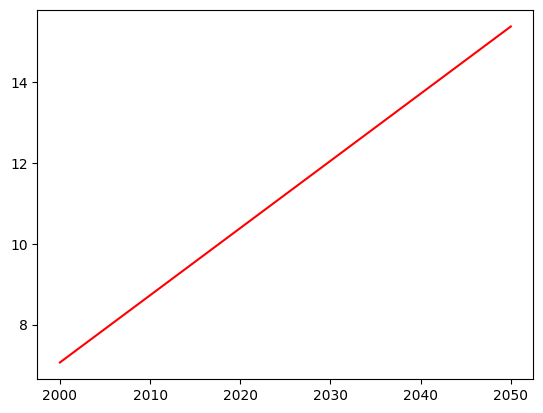

In [22]:

# --- 6. Graficar la Segunda Línea ---
# Este es el comando clave que dibujarías en Matplotlib:
plt.plot(años_proyeccion_reciente, nivel_mar_proyectado_reciente, 'r', label='Ajuste 2000-2050')

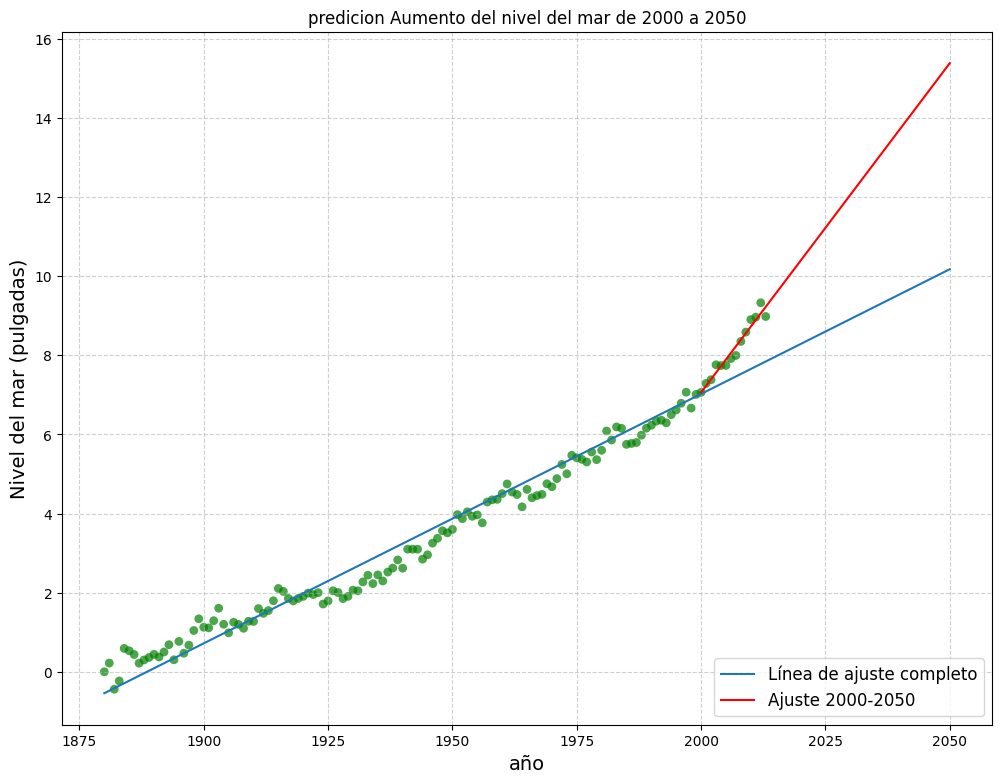

In [30]:
fig, ax = plt.subplots(figsize=(12, 9))
plt.plot(años_proyeccion, nivel_mar_proyectado, label='Línea de ajuste completo')
plt.plot(años_proyeccion_reciente, nivel_mar_proyectado_reciente, 'r', label='Ajuste 2000-2050')
ax.scatter(x, y,
               s=40, # tamaño de los puntos
               color='green', # color
               alpha=0.7, #transparencia de los puntos
               edgecolors='none')

plt.xlabel("año", size=14)
plt.ylabel("Nivel del mar (pulgadas)", size=14)
plt.title("predicion Aumento del nivel del mar de 2000 a 2050")
plt.legend(loc='lower right', fontsize=12) # Muestra las etiquetas (labels) de las líneas
plt.grid(True, linestyle='--', alpha=0.6) # Añade una cuadrícula suave

fig = ax.get_figure()
fig.savefig("figura.png")
plt.show()

**descripcion**
* Puntos Verdes: Representan los datos reales e históricos del nivel del mar ajustado (CSIRO) a lo largo de los años. Muestran que, si bien el nivel ha aumentado desde 1880
* linea azul Tendencia Histórica: Esta línea representa el promedio de la tasa de aumento del nivel del mar considerando todos los datos desde 1880 hasta el año más reciente (alrededor de 2013).
* Línea de Ajuste Reciente (Roja)
Aceleración: Esta línea es la clave. Muestra la tendencia de aumento del nivel del mar utilizando solo los datos a partir del año 2000.

** Conclusión Visual: La línea roja es notablemente más inclinada (tiene una pendiente mayor) que la línea azul. Esto significa que la tasa de aumento del nivel del mar ha acelerado significativamente en el siglo XXI**